In [132]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random

In [ ]:
x = 0
y = 1
plt.plot(x, y, marker = "*")

plt.grid()
plt.show()

In [ ]:
x = [1, 10]
y = [-1, 8]

plt.plot(x, y, marker = "o")


# Esta función la podemos usar para marcar el eje X
plt.axhline(0, color = "red")

# Esta función la podemos usar para marcar el eje Y
plt.axvline(0, color = "green") 

plt.grid()
plt.show()

In [ ]:
x = np.linspace(1, 10, 10)
y = [-3, 7, 10, 6, 3, 9, 0, -6, 2, 9]

plt.plot(x, y, marker = "o", color = "red")

# Eje X
plt.axhline(0, color = "green")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()

In [ ]:
X = [random.randint(-20, 20) for x in range(20)]
Y = [random.randint(-20, 20) for x in range(20)]

plt.scatter(X, Y)

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()


In [113]:
#cargar un dataset en numpy



In [ ]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
          city_consumption = pkl.load(f)
       
          
city_consumption

In [ ]:
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
city_consumption
road_consumption
manufacturers

In [ ]:
print(manufacturers.dtype)
print(manufacturers.shape)


In [ ]:
print(f"Consumo medio en ciudad: {np.round(np.mean(city_consumption),2):.2f}")
print(f"Coche que mas consume en ciudad: {np.round(np.max(city_consumption),2):.2f}")
print(f"Coche que menos consume en ciudad: {np.round(np.min(city_consumption),2):.2f}")
print(f"Consumo mediana en ciudad: {np.round(np.median(city_consumption),2):.2f}")
print(f"Consumo medio en carretera: {np.round(np.mean(road_consumption),2):.2f}")
print(f"Coche que mas consume en carretera: {np.round(np.max(road_consumption),2):.2f}")
print(f"Coche que menos consume en carretera: {np.round(np.min(road_consumption),2):.2f}")
print(f"Consumo mediana en carretera: {np.round(np.median(road_consumption),2):.2f}")

In [ ]:
plt.hist(city_consumption, bins=30); # el punto y como final evita que aparezca el array
plt.grid()#bins es la cantidad de barras del histograma

In [ ]:
plt.hist(road_consumption, bins=30);
plt.grid()

In [ ]:
#superponer los graficos
plt.hist(city_consumption, bins=30);
plt.hist(road_consumption, bins=30);
plt.xlabel("Consumo en litros")
plt.ylabel("Cantidad coches")
plt.grid()

In [ ]:
np.quantile(a = city_consumption, q= 0.25, interpolation = "lower") #primer quartil
np.quantile(a = city_consumption, q= 0.5, interpolation = "lower")  #segundo quartil 
np.quantile(a = city_consumption, q= 0.75, interpolation = "lower") #te4rmer quartil
np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower")

In [ ]:
# Filtros: mascara booleana
city_consumption[city_consumption >= 26]
#np.where

In [ ]:
#Rango
print(f"Rango consumo ciudad: {round(np.max(city_consumption) - np.min(city_consumption),2):.2f}") #con redondeo y dos decimales
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")


In [ ]:
#rango quartiles rango intercuartilico IQR
# 1,5 veces mas alla del iqr se consideran valores anomalos o outliers
q1 = np.quantile (a= city_consumption, q= 0.25, interpolation = "lower")
q3 = np.quantile (a= city_consumption, q= 0.75, interpolation = "lower")
iqr = q3-q1
print(f"Rango intercuartilico IQR: {iqr}")

In [ ]:
#pintar media, mediana, q1, q3, min, max en un histograma
c_mini = np.min(road_consumption)
c_maxi = np.max(road_consumption)
c_media = np.mean(city_consumption)
c_mediana = np.median(city_consumption)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=30, color='skyblue', alpha=0.5)
plt.axvline(q1, color='red', linestyle= 'dashed', linewidth=2, label=(f"Q1: {q1:.1f}"))
plt.axvline(q3, color='green', linestyle= 'dashed', linewidth=2, label=(f"Q3: {q3:.1f}"))
plt.axvline(mini, color='orange', linestyle= 'dashed', linewidth=2, label=(f"Min: {c_mini:.1f}"))
plt.axvline(maxi, color='black', linestyle= 'dashed', linewidth=2, label=(f"Max: {c_maxi:.1f}"))
plt.axvline(c_media, color= 'grey', linestyle= 'dashed', linewidth=2, label=(f"mean: {c_media:.1f}"))
plt.axvline(c_mediana, color= 'blue', linestyle= 'dashed', linewidth=2, label=(f"median: {c_mediana:.1f}"))
plt.legend() 
plt.show()

#plt.grid()



In [ ]:
#boxplot calcula y muestra los valores IQR, max, min,,mediana
#plt.boxplot(city_consumption); #showmeans= True me mostraría tambien la media
plt.boxplot(city_consumption, showmeans=True)
plt.grid()

In [ ]:
#Filtrar usando percentiles
print(np.percentile(city_consumption, 10)) #es lo mismo uno que otro
print(np.quantile(city_consumption, 0.1))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {round(percentil_10 ,2):.2f}") #aca se ve mejor el redondeo y como se muestra
print(f"percentil 90: {percentil_90}")


#coches que menos consumen
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]
#coches que mas consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
# print(coches_menor_consumo.shape)
print(f"media: {round(np.mean(coches_menor_consumo),2):.2f}")
print("10 % coches mayor consumo")
# print(coches_mayor_consumo.shape)
print(f"media: {round(np.mean(coches_mayor_consumo),2):.2f}")

In [ ]:
#Varianza: Que dispersion tienen los datos con respecto a la media
varianza = np.var(city_consumption)
print(f"Varianza: {varianza}")

#Desviación estandar: raiz cuadrada de la varianza
desviacion = np.std(city_consumption)
print(f"Desviacion estandar: {desviacion:.2f}")

In [155]:
#contar cuantos coches hay de cada marca
conteo = Counter(manufacturers)

#guardar los 10 fabricantes que mas se repiten en este dataset
top_10 = conteo.most_common(10)

#mostrarlo con mejor formato
for fabri, count in top_10:
    print(f"Fabricante  {fabri} tiene {count} coches")

#desempaquetar en dos array
fabricantes, conteos = zip(*top_10)

top_10
print(fabricantes)
print(conteos)


#moda de manufacturers


Fabricante  FORD tiene 90 coches
Fabricante  CHEVROLET tiene 86 coches
Fabricante  BMW tiene 64 coches
Fabricante  MERCEDES-BENZ tiene 59 coches
Fabricante  AUDI tiene 49 coches
Fabricante  GMC tiene 49 coches
Fabricante  TOYOTA tiene 49 coches
Fabricante  PORSCHE tiene 44 coches
Fabricante  VOLKSWAGEN tiene 42 coches
Fabricante  DODGE tiene 39 coches
(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


ModeResult(mode=np.int64(49), count=np.int64(3))

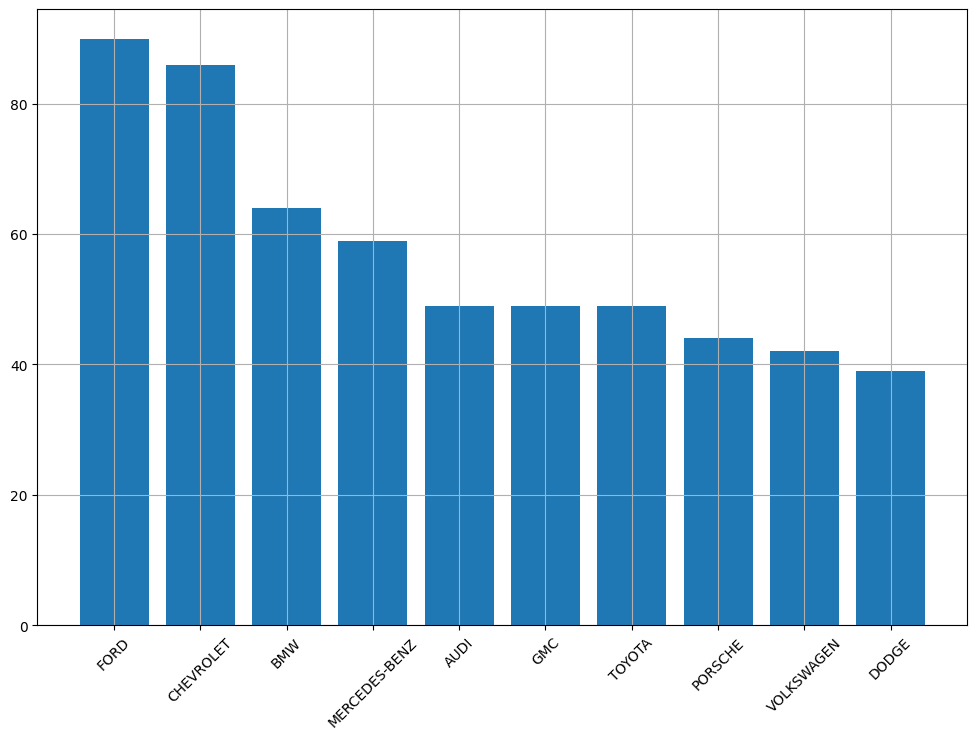

In [154]:
#grafico de barras
plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos)
plt.xticks(rotation=45); #o bien utilizar plt.barh
plt.grid()

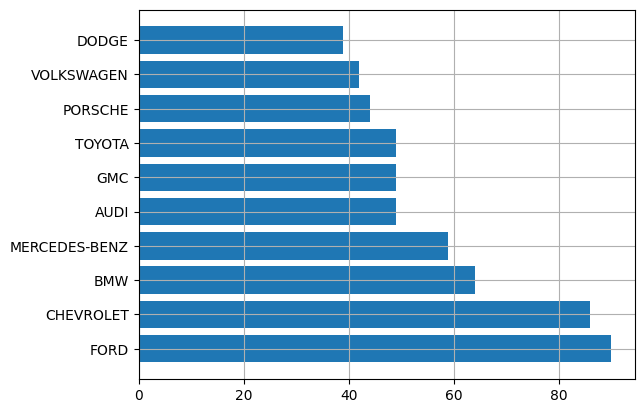

In [153]:
plt.barh(fabricantes, conteos)
plt.grid()

In [157]:
#metodo para ver outliers
def filtrar_outliers(array):
    pass

In [158]:
city_consumption.shape #1067 vehiculos


(1067,)